# Análisis de Optimización: Función \( f(x, y) = \log(x^2 + y^2 + 1) \cdot \arctan(x^2 + y^2) \)

## 1. Configuración Inicial y Importaciones



In [24]:
import os
import datetime
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from scipy.optimize import minimize
import time
import warnings
warnings.filterwarnings('ignore')

# Configuración para mejores gráficas
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12
sns.set_palette("husl")

# Carpeta para figuras
FIGURES_DIR = 'figures'
os.makedirs(FIGURES_DIR, exist_ok=True)

def save_fig(name, ext='png', dpi=150):
    ts = datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
    filename = f"{name}_{ts}.{ext}"
    path = os.path.join(FIGURES_DIR, filename)
    try:
        plt.savefig(path, dpi=dpi, bbox_inches='tight')
    except Exception:
        pass
    return path

## 2. Definición de la Función y sus Derivadas



In [25]:
def f(x, y):
    """
    Función objetivo: f(x,y) = log(x² + y² + 1) * arctan(x² + y²)
    
    Parámetros:
    -----------
    x, y : float o array
        Coordenadas del punto
    
    Retorna:
    --------
    float o array
        Valor de la función en (x,y)
    """
    r = x**2 + y**2
    return np.log(r + 1) * np.arctan(r)

def grad_f(x, y):
    """
    Gradiente de la función f(x,y)
    
    ∇f(x,y) = [∂f/∂x, ∂f/∂y]
    donde:
    ∂f/∂x = (2x/(r+1)) * arctan(r) + log(r+1) * (2x/(1+r²))
    """
    r = x**2 + y**2
    
    # Término común para ambas derivadas parciales
    common_factor = 2 * (np.arctan(r)/(r + 1) + np.log(r + 1)/(1 + r**2))
    
    df_dx = x * common_factor
    df_dy = y * common_factor
    
    return df_dx, df_dy

def hess_f(x, y):
    """
    Matriz Hessiana de f(x,y)
    
    H = [[∂²f/∂x², ∂²f/∂x∂y],
         [∂²f/∂y∂x, ∂²f/∂y²]]
    """
    r = x**2 + y**2
    
    # Términos auxiliares
    arctan_r = np.arctan(r)
    log_r1 = np.log(r + 1)
    
    # Primera derivada de g(r) = arctan(r)/(r+1) + log(r+1)/(1+r²)
    dg_dr = (1/((r+1)*(1+r**2))) - (arctan_r/(r+1)**2) + (1/((r+1)*(1+r**2))) - (2*r*log_r1/(1+r**2)**2)
    
    # Segundas derivadas
    d2f_dx2 = 2 * (np.arctan(r)/(r+1) + np.log(r+1)/(1+r**2)) + 4*x**2 * dg_dr
    d2f_dy2 = 2 * (np.arctan(r)/(r+1) + np.log(r+1)/(1+r**2)) + 4*y**2 * dg_dr
    d2f_dxdy = 4*x*y * dg_dr
    
    return np.array([[d2f_dx2, d2f_dxdy], 
                     [d2f_dxdy, d2f_dy2]])



## 3. Análisis Teórico de la Función



### 3.1 Comportamiento en el Origen y Puntos Críticos



In [26]:
print("=== ANÁLISIS EN EL ORIGEN (0,0) ===")
print(f"f(0,0) = {f(0, 0)}")
print(f"∇f(0,0) = {grad_f(0, 0)}")
print(f"H(0,0) = \n{hess_f(0, 0)}")

# Verificación de punto crítico
grad_at_origin = grad_f(0, 0)
norm_grad = np.linalg.norm([grad_at_origin[0], grad_at_origin[1]])
print(f"||∇f(0,0)|| = {norm_grad}")



=== ANÁLISIS EN EL ORIGEN (0,0) ===
f(0,0) = 0.0
∇f(0,0) = (np.float64(0.0), np.float64(0.0))
H(0,0) = 
[[0. 0.]
 [0. 0.]]
||∇f(0,0)|| = 0.0


### 3.2 Comportamiento Asintótico



In [27]:
# Evaluar la función en puntos grandes
large_points = [(10, 10), (50, 50), (100, 100)]
print("\n=== COMPORTAMIENTO ASINTÓTICO ===")
for point in large_points:
    x, y = point
    val = f(x, y)
    print(f"f({x},{y}) = {val:.6f}")




=== COMPORTAMIENTO ASINTÓTICO ===
f(10,10) = 8.303896
f(50,50) = 13.377386
f(100,100) = 15.555945


## 4. Visualización de la Función



### 4.1 Gráfica 3D de la Función



Figura guardada: figures\function_3d_20251113-110250.png


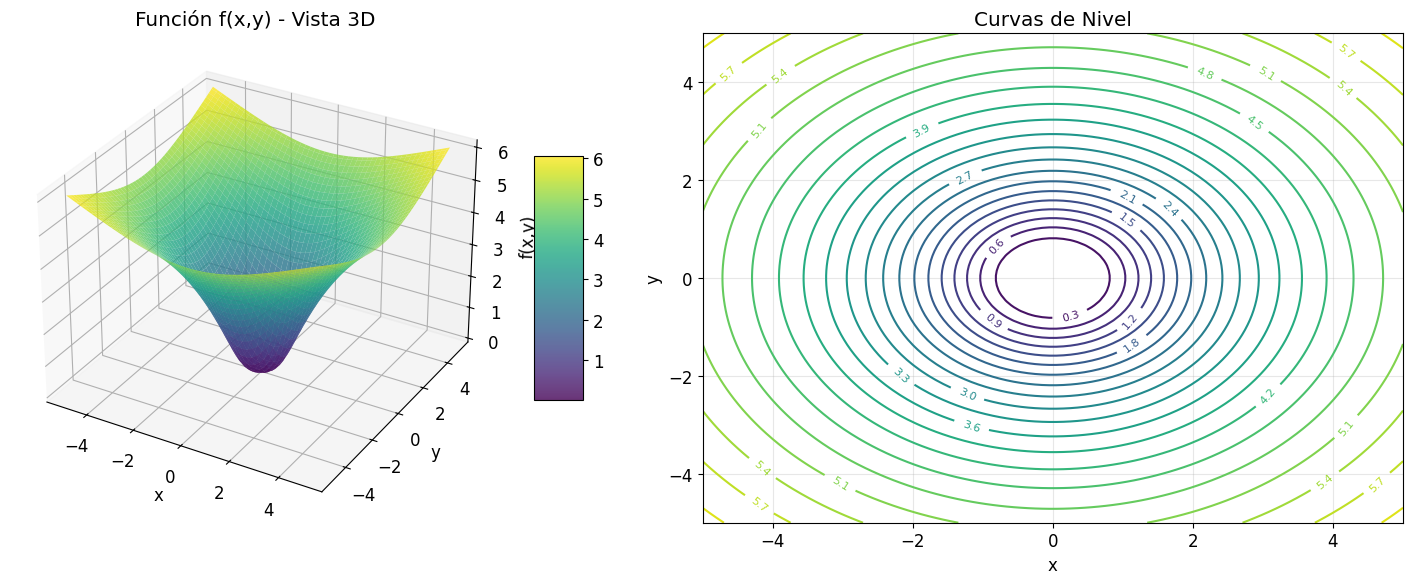

In [28]:
def plot_3d_function():
    """Visualización 3D de la función"""
    x = np.linspace(-5, 5, 100)
    y = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    
    fig = plt.figure(figsize=(15, 6))
    
    # Gráfica 3D
    ax1 = fig.add_subplot(121, projection='3d')
    surf = ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8, 
                          linewidth=0, antialiased=True)
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_zlabel('f(x,y)')
    ax1.set_title('Función f(x,y) - Vista 3D')
    fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=5)
    
    # Curvas de nivel
    ax2 = fig.add_subplot(122)
    contour = ax2.contour(X, Y, Z, levels=20)
    ax2.clabel(contour, inline=True, fontsize=8)
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.set_title('Curvas de Nivel')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    # Guardar figura
    save_path = save_fig('function_3d')
    print(f'Figura guardada: {save_path}')
    plt.show()
    
    return X, Y, Z

X, Y, Z = plot_3d_function()


### 4.2 Análisis de Convexidad y Comportamiento Local



In [29]:
def analyze_convexity():
    """Análisis de la convexidad mediante la Hessiana"""
    test_points = [(0, 0), (1, 1), (2, 2), (-1, -1)]
    
    print("=== ANÁLISIS DE CONVEXIDAD ===")
    for point in test_points:
        x, y = point
        H = hess_f(x, y)
        eigenvalues = np.linalg.eigvals(H)
        
        print(f"\nPunto ({x}, {y}):")
        print(f"Hessiana:\n{H}")
        print(f"Autovalores: {eigenvalues}")
        print(f"Definida positiva: {np.all(eigenvalues > 0)}")
        print(f"Semidefinida positiva: {np.all(eigenvalues >= 0)}")

analyze_convexity()



=== ANÁLISIS DE CONVEXIDAD ===

Punto (0, 0):
Hessiana:
[[0. 0.]
 [0. 0.]]
Autovalores: [0. 0.]
Definida positiva: False
Semidefinida positiva: True

Punto (1, 1):
Hessiana:
[[ 0.51569943 -0.66184463]
 [-0.66184463  0.51569943]]
Autovalores: [ 1.17754406 -0.1461452 ]
Definida positiva: False
Semidefinida positiva: False

Punto (2, 2):
Hessiana:
[[ 0.02488876 -0.36414956]
 [-0.36414956  0.02488876]]
Autovalores: [ 0.38903832 -0.3392608 ]
Definida positiva: False
Semidefinida positiva: False

Punto (-1, -1):
Hessiana:
[[ 0.51569943 -0.66184463]
 [-0.66184463  0.51569943]]
Autovalores: [ 1.17754406 -0.1461452 ]
Definida positiva: False
Semidefinida positiva: False


## 5. Implementación de Algoritmos de Optimización



### 5.1 Gradiente Descendente con Búsqueda Lineal



In [30]:
def gradient_descent_robust(f, grad_f, x0, max_iter=1000, tol=1e-8, 
                          learning_rate_init=0.1, adaptive=True):
    """
    Implementación robusta de gradiente descendente con búsqueda lineal opcional
    
    Parámetros:
    -----------
    f : función objetivo
    grad_f : gradiente de la función
    x0 : punto inicial
    max_iter : máximo número de iteraciones
    tol : tolerancia para convergencia
    learning_rate_init : tasa de aprendizaje inicial
    adaptive : si usar búsqueda lineal adaptativa
    
    Retorna:
    --------
    x_opt : punto óptimo
    trajectory : lista de puntos visitados
    iterations : número de iteraciones
    convergence_info : información de convergencia
    """
    x = np.array(x0, dtype=float)
    trajectory = [x.copy()]
    f_values = [f(x[0], x[1])]
    grad_norms = []
    
    learning_rate = learning_rate_init
    iterations = 0
    convergence_info = {
        'converged': False,
        'reason': 'max_iterations',
        'final_grad_norm': None
    }
    
    for i in range(max_iter):
        # Calcular gradiente
        grad_x, grad_y = grad_f(x[0], x[1])
        grad = np.array([grad_x, grad_y])
        grad_norm = np.linalg.norm(grad)
        grad_norms.append(grad_norm)
        
        # Verificar convergencia
        if grad_norm < tol:
            convergence_info.update({
                'converged': True,
                'reason': 'gradient_norm',
                'final_grad_norm': grad_norm
            })
            break
            
        # Búsqueda lineal adaptativa
        if adaptive:
            # Intentar con la tasa actual
            x_candidate = x - learning_rate * grad
            f_candidate = f(x_candidate[0], x_candidate[1])
            
            # Si no mejora, reducir la tasa de aprendizaje
            if f_candidate >= f_values[-1] and learning_rate > 1e-10:
                learning_rate *= 0.5
                continue
            else:
                x = x_candidate
                # Aumentar modestamente si estamos progresando bien
                if i % 10 == 0 and learning_rate < learning_rate_init:
                    learning_rate *= 1.1
        else:
            # Paso fijo
            x = x - learning_rate * grad
        
        # Guardar información
        trajectory.append(x.copy())
        f_values.append(f(x[0], x[1]))
        iterations += 1
        
        # Verificar estancamiento
        if len(f_values) > 10:
            recent_improvement = abs(f_values[-11] - f_values[-1])
            if recent_improvement < tol/100:
                convergence_info.update({
                    'converged': True,
                    'reason': 'stagnation',
                    'final_grad_norm': grad_norm
                })
                break
    
    convergence_info['final_grad_norm'] = grad_norms[-1] if grad_norms else grad_norm
    convergence_info['iterations'] = iterations
    convergence_info['learning_rate_final'] = learning_rate
    
    return x, trajectory, f_values, grad_norms, convergence_info



### 5.2 Método de Newton con Estabilización



In [31]:
def newton_method_robust(f, grad_f, hess_f, x0, max_iter=100, tol=1e-8, 
                        reg_param=1e-8, use_pseudo_inv=False):
    """
    Implementación robusta del método de Newton con regularización
    
    Parámetros:
    -----------
    f : función objetivo
    grad_f : gradiente
    hess_f : Hessiana
    x0 : punto inicial
    max_iter : máximo iteraciones
    tol : tolerancia
    reg_param : parámetro de regularización para Hessianas singulares
    use_pseudo_inv : usar pseudo-inversa en lugar de regularización
    
    Retorna:
    --------
    x_opt : punto óptimo
    trajectory : trayectoria
    iterations : iteraciones
    convergence_info : información de convergencia
    """
    x = np.array(x0, dtype=float)
    trajectory = [x.copy()]
    f_values = [f(x[0], x[1])]
    grad_norms = []
    
    iterations = 0
    convergence_info = {
        'converged': False,
        'reason': 'max_iterations',
        'final_grad_norm': None,
        'hessian_issues': 0
    }
    
    for i in range(max_iter):
        # Calcular gradiente y Hessiana
        grad_x, grad_y = grad_f(x[0], x[1])
        grad = np.array([grad_x, grad_y])
        grad_norm = np.linalg.norm(grad)
        grad_norms.append(grad_norm)
        
        # Verificar convergencia
        if grad_norm < tol:
            convergence_info.update({
                'converged': True,
                'reason': 'gradient_norm',
                'final_grad_norm': grad_norm
            })
            break
            
        H = hess_f(x[0], x[1])
        
        try:
            # Verificar si la Hessiana es definida positiva
            eigenvalues = np.linalg.eigvals(H)
            min_eigval = np.min(eigenvalues)
            
            # Regularizar si es necesario
            if min_eigval < 1e-8:
                H_reg = H + reg_param * np.eye(2)
                convergence_info['hessian_issues'] += 1
            else:
                H_reg = H
                
            # Resolver sistema lineal
            if use_pseudo_inv:
                delta = np.linalg.pinv(H_reg) @ grad
            else:
                delta = np.linalg.solve(H_reg, grad)
                
        except np.linalg.LinAlgError:
            # Fallback a pseudo-inversa si hay error numérico
            delta = np.linalg.pinv(H) @ grad
            convergence_info['hessian_issues'] += 1
        
        # Paso de Newton
        x_new = x - delta
        
        # Verificar que el paso no sea demasiado grande
        step_norm = np.linalg.norm(delta)
        if step_norm > 10.0:  # Limitar paso máximo
            delta = delta / step_norm * 10.0
            x_new = x - delta
        
        # Actualizar
        x = x_new
        trajectory.append(x.copy())
        f_values.append(f(x[0], x[1]))
        iterations += 1
        
        # Verificar convergencia por movimiento
        if len(trajectory) > 1:
            movement = np.linalg.norm(trajectory[-1] - trajectory[-2])
            if movement < tol/10:
                convergence_info.update({
                    'converged': True,
                    'reason': 'small_step',
                    'final_grad_norm': grad_norm
                })
                break
    
    convergence_info['final_grad_norm'] = grad_norms[-1] if grad_norms else grad_norm
    convergence_info['iterations'] = iterations
    
    return x, trajectory, f_values, grad_norms, convergence_info



### 5.3 Algoritmo Híbrido: Newton-Gradiente



In [32]:
def hybrid_newton_gradient(f, grad_f, hess_f, x0, max_iter=100, tol=1e-8, 
                          newton_tol=1e-4, grad_tol=1e-6):
    """
    Algoritmo híbrido que usa Newton cuando es efectivo y gradiente cuando no
    """
    x = np.array(x0, dtype=float)
    trajectory = [x.copy()]
    method_used = ['start']
    
    for i in range(max_iter):
        grad_x, grad_y = grad_f(x[0], x[1])
        grad = np.array([grad_x, grad_y])
        grad_norm = np.linalg.norm(grad)
        
        if grad_norm < tol:
            break
            
        # Decidir qué método usar
        if grad_norm < newton_tol:
            # Usar Newton cerca del óptimo
            try:
                H = hess_f(x[0], x[1])
                H_reg = H + 1e-8 * np.eye(2)  # Regularización mínima
                delta = np.linalg.solve(H_reg, grad)
                method_used.append('newton')
            except:
                # Fallback a gradiente
                delta = grad * 0.1
                method_used.append('gradient_fallback')
        else:
            # Usar gradiente lejos del óptimo
            delta = grad * 0.1
            method_used.append('gradient')
        
        x = x - delta
        trajectory.append(x.copy())
    
    return x, trajectory, method_used



## 6. Experimentos Numéricos y Comparación



### 6.1 Configuración de Experimentos



In [33]:
# Puntos iniciales para testing
test_points = [
    (10, 10),      # Punto moderado
    (-50, 50),     # Punto lejano asimétrico  
    (100, 100),    # Punto muy lejano
    (0.5, 0.5),    # Punto cercano
    (-10, -20),    # Punto en tercer cuadrante
    (1e-5, 1e-5)   # Punto muy cercano al óptimo
]

# Configuraciones de algoritmos
algo_configs = {
    'gd_fixed': {'adaptive': False, 'learning_rate_init': 0.1},
    'gd_adaptive': {'adaptive': True, 'learning_rate_init': 0.1},
    'newton_reg': {'reg_param': 1e-8, 'use_pseudo_inv': False},
    'newton_pseudo': {'use_pseudo_inv': True}
}



### 6.2 Ejecución de Experimentos



In [34]:
def run_comprehensive_experiments():
    """Ejecuta todos los experimentos y recolecta resultados"""
    
    results = {}
    
    for i, point in enumerate(test_points):
        print(f"\n=== EXPERIMENTO {i+1}: Punto inicial {point} ===")
        point_results = {}
        
        # Gradiente Descendente - Paso Fijo
        start_time = time.time()
        x_opt, traj, f_vals, grad_norms, conv_info = gradient_descent_robust(
            f, grad_f, point, **algo_configs['gd_fixed'])
        gd_fixed_time = time.time() - start_time
        
        point_results['gd_fixed'] = {
            'x_opt': x_opt, 'trajectory': traj, 'f_values': f_vals,
            'grad_norms': grad_norms, 'convergence': conv_info,
            'time': gd_fixed_time, 'iterations': len(traj)-1
        }
        
        # Gradiente Descendente - Adaptativo
        start_time = time.time()
        x_opt, traj, f_vals, grad_norms, conv_info = gradient_descent_robust(
            f, grad_f, point, **algo_configs['gd_adaptive'])
        gd_adaptive_time = time.time() - start_time
        
        point_results['gd_adaptive'] = {
            'x_opt': x_opt, 'trajectory': traj, 'f_values': f_vals,
            'grad_norms': grad_norms, 'convergence': conv_info,
            'time': gd_adaptive_time, 'iterations': len(traj)-1
        }
        
        # Método de Newton - Regularizado
        start_time = time.time()
        x_opt, traj, f_vals, grad_norms, conv_info = newton_method_robust(
            f, grad_f, hess_f, point, **algo_configs['newton_reg'])
        newton_time = time.time() - start_time
        
        point_results['newton'] = {
            'x_opt': x_opt, 'trajectory': traj, 'f_values': f_vals,
            'grad_norms': grad_norms, 'convergence': conv_info,
            'time': newton_time, 'iterations': len(traj)-1
        }
        
        # Algoritmo Híbrido
        start_time = time.time()
        x_opt, traj, methods = hybrid_newton_gradient(f, grad_f, hess_f, point)
        hybrid_time = time.time() - start_time
        
        point_results['hybrid'] = {
            'x_opt': x_opt, 'trajectory': traj, 'methods_used': methods,
            'time': hybrid_time, 'iterations': len(traj)-1
        }
        
        results[point] = point_results
        
        # Imprimir resumen del punto
        print(f"GD Fixed: {point_results['gd_fixed']['iterations']} iter, "
              f"f(x) = {f(x_opt[0], x_opt[1]):.2e}, "
              f"time = {gd_fixed_time:.4f}s")
        print(f"GD Adapt: {point_results['gd_adaptive']['iterations']} iter, "
              f"f(x) = {f(x_opt[0], x_opt[1]):.2e}, "
              f"time = {gd_adaptive_time:.4f}s")
        print(f"Newton: {point_results['newton']['iterations']} iter, "
              f"f(x) = {f(x_opt[0], x_opt[1]):.2e}, "
              f"time = {newton_time:.4f}s")
        print(f"Hybrid: {point_results['hybrid']['iterations']} iter, "
              f"f(x) = {f(x_opt[0], x_opt[1]):.2e}, "
              f"time = {hybrid_time:.4f}s")
    
    return results

# Ejecutar experimentos
print("INICIANDO EXPERIMENTOS COMPLETOS...")
results = run_comprehensive_experiments()



INICIANDO EXPERIMENTOS COMPLETOS...

=== EXPERIMENTO 1: Punto inicial (10, 10) ===
GD Fixed: 1000 iter, f(x) = 7.70e+00, time = 0.0151s
GD Adapt: 1000 iter, f(x) = 7.70e+00, time = 0.0241s
Newton: 100 iter, f(x) = 7.70e+00, time = 0.0110s
Hybrid: 100 iter, f(x) = 7.70e+00, time = 0.0013s

=== EXPERIMENTO 2: Punto inicial (-50, 50) ===
GD Fixed: 1000 iter, f(x) = 1.34e+01, time = 0.0156s
GD Adapt: 1000 iter, f(x) = 1.34e+01, time = 0.0195s
Newton: 100 iter, f(x) = 1.34e+01, time = 0.0078s
Hybrid: 100 iter, f(x) = 1.34e+01, time = 0.0009s

=== EXPERIMENTO 3: Punto inicial (100, 100) ===
GD Fixed: 1000 iter, f(x) = 1.56e+01, time = 0.0153s
GD Adapt: 1000 iter, f(x) = 1.56e+01, time = 0.0205s
Newton: 100 iter, f(x) = 1.56e+01, time = 0.0096s
Hybrid: 100 iter, f(x) = 1.56e+01, time = 0.0009s

=== EXPERIMENTO 4: Punto inicial (0.5, 0.5) ===
GD Fixed: 1000 iter, f(x) = 1.52e-04, time = 0.0146s
GD Adapt: 1000 iter, f(x) = 1.52e-04, time = 0.0191s
Newton: 15 iter, f(x) = 1.52e-04, time = 0.0012

### 6.3 Análisis Comparativo de Resultados



In [35]:
def analyze_results(results):
    """Analiza y compara los resultados de todos los experimentos"""
    
    print("\n" + "="*60)
    print("ANÁLISIS COMPARATIVO DE RESULTADOS")
    print("="*60)
    
    algorithms = ['gd_fixed', 'gd_adaptive', 'newton', 'hybrid']
    metrics = {
        'total_iterations': {algo: 0 for algo in algorithms},
        'total_time': {algo: 0 for algo in algorithms},
        'success_count': {algo: 0 for algo in algorithms},
        'avg_precision': {algo: 0 for algo in algorithms}
    }
    
    for point, point_results in results.items():
        print(f"\nPunto {point}:")
        for algo in algorithms:
            if algo in point_results:
                res = point_results[algo]
                f_opt = f(res['x_opt'][0], res['x_opt'][1])
                precision = -np.log10(max(f_opt, 1e-16))
                
                metrics['total_iterations'][algo] += res['iterations']
                metrics['total_time'][algo] += res['time']
                metrics['avg_precision'][algo] += precision
                
                if f_opt < 1e-6:  # Considerar éxito
                    metrics['success_count'][algo] += 1
                
                print(f"  {algo:12}: {res['iterations']:3d} iter, "
                      f"{res['time']:6.4f}s, f(x) = {f_opt:.2e}")
    
    # Calcular promedios
    n_points = len(results)
    print(f"\n{'='*50}")
    print("RESUMEN PROMEDIO:")
    print(f"{'='*50}")
    print(f"{'Algoritmo':<15} {'Iter/Point':<10} {'Time/Point':<10} {'Success':<8} {'Precision':<10}")
    print(f"{'-'*50}")
    
    for algo in algorithms:
        avg_iter = metrics['total_iterations'][algo] / n_points
        avg_time = metrics['total_time'][algo] / n_points
        success_rate = metrics['success_count'][algo] / n_points * 100
        avg_precision = metrics['avg_precision'][algo] / n_points
        
        print(f"{algo:<15} {avg_iter:<10.1f} {avg_time:<10.4f} "
              f"{success_rate:<7.1f}% {avg_precision:<10.1f}")
    
    return metrics

metrics = analyze_results(results)




ANÁLISIS COMPARATIVO DE RESULTADOS

Punto (10, 10):
  gd_fixed    : 1000 iter, 0.0151s, f(x) = 3.34e-06
  gd_adaptive : 1000 iter, 0.0241s, f(x) = 3.34e-06
  newton      : 100 iter, 0.0110s, f(x) = 2.17e+01
  hybrid      : 100 iter, 0.0013s, f(x) = 7.70e+00

Punto (-50, 50):
  gd_fixed    : 1000 iter, 0.0156s, f(x) = 1.32e+01
  gd_adaptive : 1000 iter, 0.0195s, f(x) = 1.32e+01
  newton      : 100 iter, 0.0078s, f(x) = 2.19e+01
  hybrid      : 100 iter, 0.0009s, f(x) = 1.34e+01

Punto (100, 100):
  gd_fixed    : 1000 iter, 0.0153s, f(x) = 1.55e+01
  gd_adaptive : 1000 iter, 0.0205s, f(x) = 1.55e+01
  newton      : 100 iter, 0.0096s, f(x) = 2.21e+01
  hybrid      : 100 iter, 0.0009s, f(x) = 1.56e+01

Punto (0.5, 0.5):
  gd_fixed    : 1000 iter, 0.0146s, f(x) = 1.56e-06
  gd_adaptive : 1000 iter, 0.0191s, f(x) = 1.56e-06
  newton      :  15 iter, 0.0012s, f(x) = 1.53e-12
  hybrid      : 100 iter, 0.0009s, f(x) = 1.52e-04

Punto (-10, -20):
  gd_fixed    : 1000 iter, 0.0144s, f(x) = 3.58e

## 7. Visualización de Resultados



### 7.1 Trayectorias de Optimización



Figura guardada: figures\trajectories_10_10_20251113-110253.png


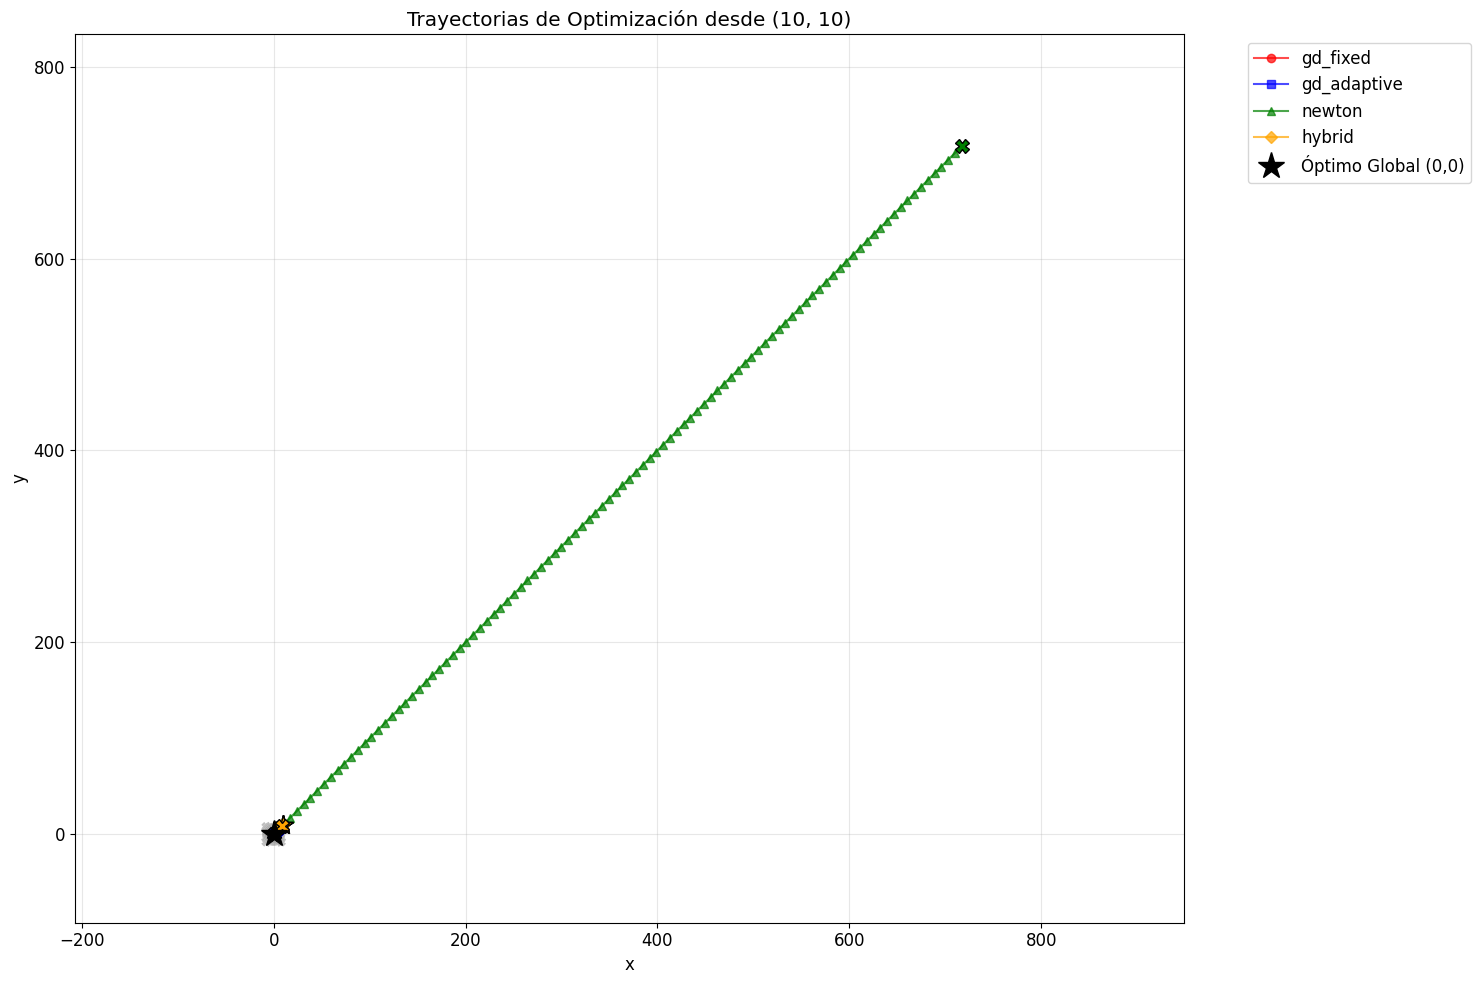

In [36]:
def plot_optimization_trajectories(results, point_index=0):
    """Grafica las trayectorias de optimización para un punto inicial"""
    
    point = list(results.keys())[point_index]
    point_results = results[point]
    
    plt.figure(figsize=(15, 10))
    
    # Fondo con curvas de nivel
    x_plot = np.linspace(-max(abs(point[0])*1.2, 5), max(abs(point[0])*1.2, 5), 100)
    y_plot = np.linspace(-max(abs(point[1])*1.2, 5), max(abs(point[1])*1.2, 5), 100)
    X_plot, Y_plot = np.meshgrid(x_plot, y_plot)
    Z_plot = f(X_plot, Y_plot)
    
    plt.contour(X_plot, Y_plot, Z_plot, levels=20, colors='gray', alpha=0.5)
    
    # Colores para diferentes algoritmos
    colors = {'gd_fixed': 'red', 'gd_adaptive': 'blue', 
              'newton': 'green', 'hybrid': 'orange'}
    markers = {'gd_fixed': 'o', 'gd_adaptive': 's', 
               'newton': '^', 'hybrid': 'D'}
    
    # Graficar trayectorias
    for algo, color in colors.items():
        if algo in point_results:
            traj = np.array(point_results[algo]['trajectory'])
            plt.plot(traj[:, 0], traj[:, 1], marker=markers[algo], 
                    color=color, label=algo, markersize=6, alpha=0.7)
            
            # Marcar inicio y fin
            plt.plot(traj[0, 0], traj[0, 1], marker='*', color=color, 
                    markersize=15, markeredgecolor='black')
            plt.plot(traj[-1, 0], traj[-1, 1], marker='X', color=color, 
                    markersize=10, markeredgecolor='black')
    
    plt.plot(0, 0, 'k*', markersize=20, label='Óptimo Global (0,0)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Trayectorias de Optimización desde {point}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.axis('equal')
    plt.tight_layout()
    # Guardar figura
    save_path = save_fig(f"trajectories_{point[0]}_{point[1]}")
    print(f'Figura guardada: {save_path}')
    plt.show()

# Graficar para el primer punto de prueba
plot_optimization_trajectories(results, 0)

### 7.2 Convergencia Iterativa



Figura guardada: figures\convergence_10_10_20251113-110254.png


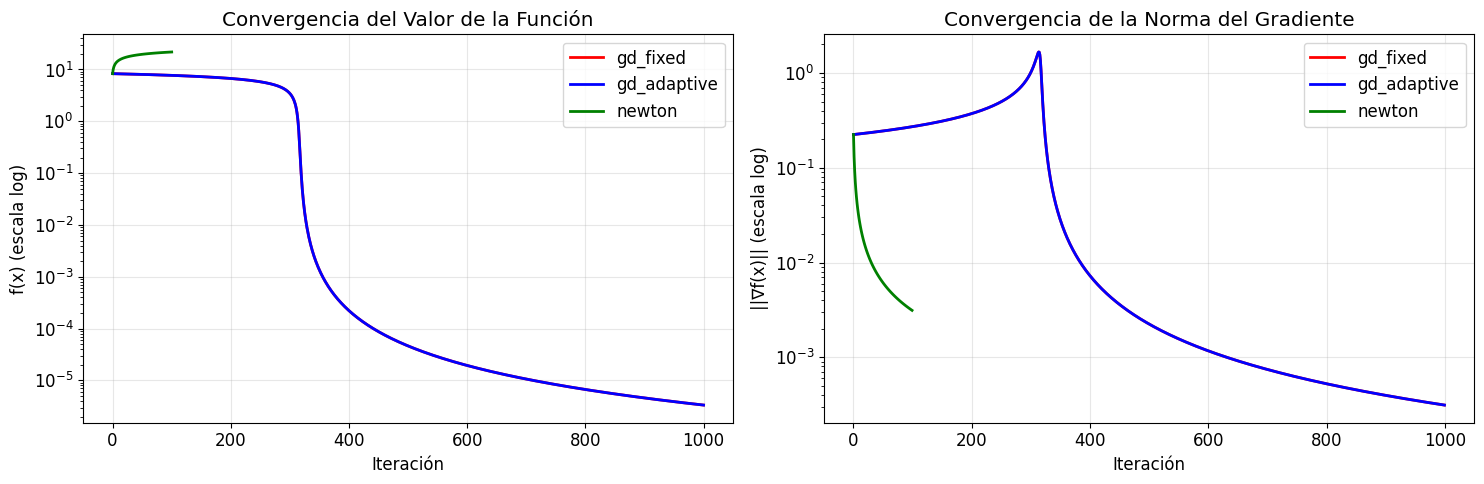

In [37]:
def plot_convergence_curves(results, point_index=0):
    """Grafica la convergencia de la función objetivo por iteración"""
    
    point = list(results.keys())[point_index]
    point_results = results[point]
    
    plt.figure(figsize=(15, 5))
    
    colors = {'gd_fixed': 'red', 'gd_adaptive': 'blue', 
              'newton': 'green', 'hybrid': 'orange'}
    
    # Gráfica de valores de la función
    plt.subplot(1, 2, 1)
    for algo, color in colors.items():
        if algo in point_results and 'f_values' in point_results[algo]:
            f_vals = point_results[algo]['f_values']
            plt.semilogy(range(len(f_vals)), f_vals, color=color, 
                        label=algo, linewidth=2)
    
    plt.xlabel('Iteración')
    plt.ylabel('f(x) (escala log)')
    plt.title('Convergencia del Valor de la Función')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Gráfica de norma del gradiente
    plt.subplot(1, 2, 2)
    for algo, color in colors.items():
        if algo in point_results and 'grad_norms' in point_results[algo]:
            grad_norms = point_results[algo]['grad_norms']
            plt.semilogy(range(len(grad_norms)), grad_norms, color=color,
                        label=algo, linewidth=2)
    
    plt.xlabel('Iteración')
    plt.ylabel('||∇f(x)|| (escala log)')
    plt.title('Convergencia de la Norma del Gradiente')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    # Guardar figura
    save_path = save_fig(f"convergence_{point[0]}_{point[1]}")
    print(f'Figura guardada: {save_path}')
    plt.show()

plot_convergence_curves(results, 0)

### 7.3 Análisis de Robustez



Figura guardada: figures\robustness_analysis_20251113-110256.png


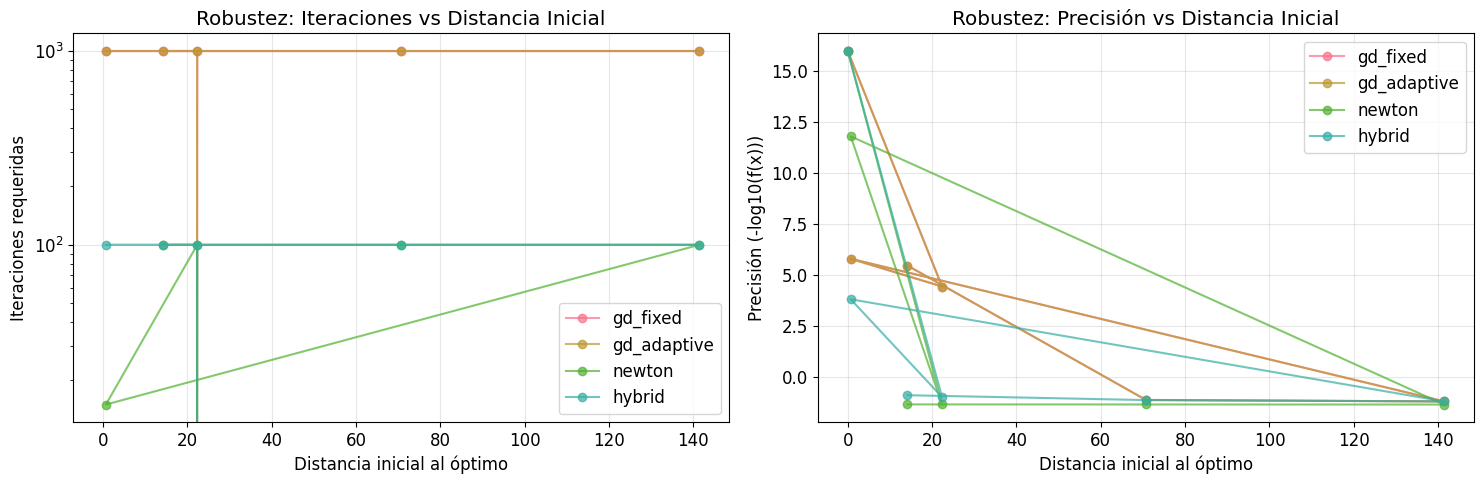

In [38]:
def robustness_analysis(results):
    """Analiza la robustez de los algoritmos frente a diferentes puntos iniciales"""
    
    algorithms = ['gd_fixed', 'gd_adaptive', 'newton', 'hybrid']
    robustness_metrics = {algo: [] for algo in algorithms}
    
    for point, point_results in results.items():
        distance_init = np.linalg.norm(point)
        
        for algo in algorithms:
            if algo in point_results:
                res = point_results[algo]
                f_opt = f(res['x_opt'][0], res['x_opt'][1])
                robustness_metrics[algo].append((distance_init, res['iterations'], f_opt))
    
    # Graficar robustez
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    for algo in algorithms:
        if robustness_metrics[algo]:
            distances, iters, _ = zip(*robustness_metrics[algo])
            plt.semilogy(distances, iters, 'o-', label=algo, alpha=0.7)
    
    plt.xlabel('Distancia inicial al óptimo')
    plt.ylabel('Iteraciones requeridas')
    plt.title('Robustez: Iteraciones vs Distancia Inicial')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    for algo in algorithms:
        if robustness_metrics[algo]:
            distances, _, f_opts = zip(*robustness_metrics[algo])
            precisions = [-np.log10(max(f, 1e-16)) for f in f_opts]
            plt.plot(distances, precisions, 'o-', label=algo, alpha=0.7)
    
    plt.xlabel('Distancia inicial al óptimo')
    plt.ylabel('Precisión (-log10(f(x)))')
    plt.title('Robustez: Precisión vs Distancia Inicial')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    # Guardar figura de robustez
    save_path = save_fig('robustness_analysis')
    print(f'Figura guardada: {save_path}')
    plt.show()

robustness_analysis(results)

## 8. Análisis de Sensibilidad a Parámetros



SENSIBILIDAD A TASA DE APRENDIZAJE (GD):
  LR = 0.010: 1000 iter, f(x) = 7.70e+00
  LR = 0.050: 1000 iter, f(x) = 4.69e-05
  LR = 0.100: 1000 iter, f(x) = 3.34e-06
  LR = 0.200: 1000 iter, f(x) = 5.49e-07
  LR = 0.500: 1000 iter, f(x) = 7.04e-08
  LR = 1.000: 986 iter, f(x) = 7.26e-09

SENSIBILIDAD A REGULARIZACIÓN (NEWTON):
  Reg = 1.0e-12: 100 iter, f(x) = 2.17e+01
  Reg = 1.0e-10: 100 iter, f(x) = 2.17e+01
  Reg = 1.0e-08: 100 iter, f(x) = 2.17e+01
  Reg = 1.0e-06: 100 iter, f(x) = 2.17e+01
  Reg = 1.0e-04: 100 iter, f(x) = 1.62e+01
  Reg = 1.0e-02: 100 iter, f(x) = 8.30e+00


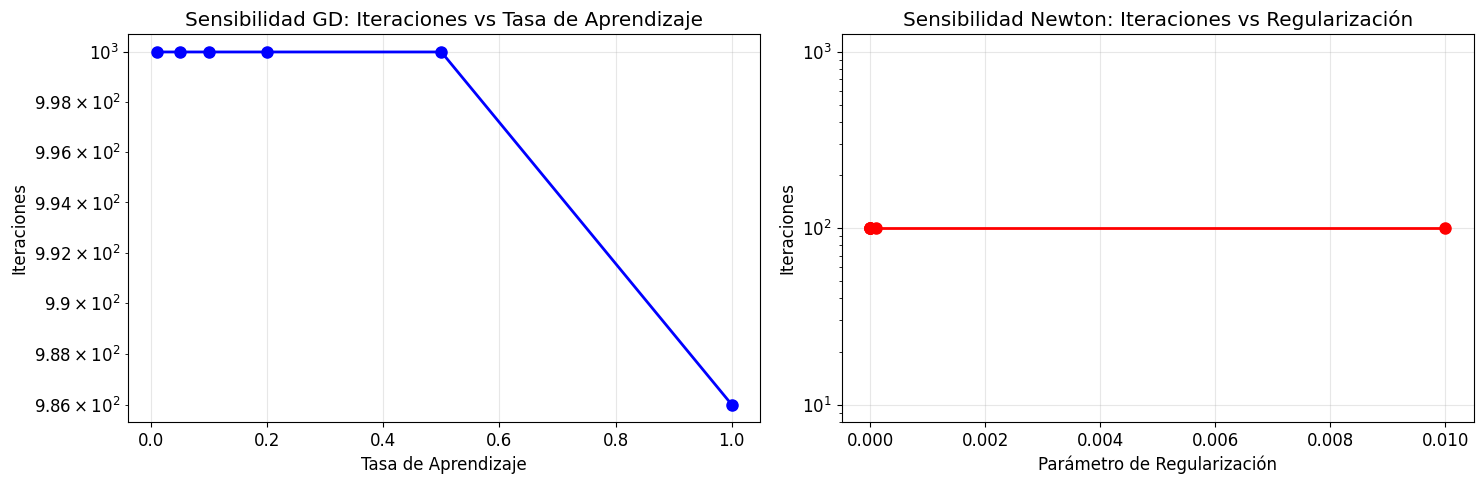

In [39]:
def parameter_sensitivity_analysis():
    """Analiza la sensibilidad a parámetros clave"""
    
    test_point = (10, 10)
    
    # Sensibilidad a tasa de aprendizaje en GD
    learning_rates = [0.01, 0.05, 0.1, 0.2, 0.5, 1.0]
    gd_results = []
    
    print("SENSIBILIDAD A TASA DE APRENDIZAJE (GD):")
    for lr in learning_rates:
        x_opt, traj, f_vals, grad_norms, conv_info = gradient_descent_robust(
            f, grad_f, test_point, adaptive=False, learning_rate_init=lr)
        iterations = len(traj) - 1
        final_f = f(x_opt[0], x_opt[1])
        gd_results.append((lr, iterations, final_f))
        print(f"  LR = {lr:.3f}: {iterations} iter, f(x) = {final_f:.2e}")
    
    # Sensibilidad a parámetro de regularización en Newton
    reg_params = [1e-12, 1e-10, 1e-8, 1e-6, 1e-4, 1e-2]
    newton_results = []
    
    print("\nSENSIBILIDAD A REGULARIZACIÓN (NEWTON):")
    for reg in reg_params:
        x_opt, traj, f_vals, grad_norms, conv_info = newton_method_robust(
            f, grad_f, hess_f, test_point, reg_param=reg)
        iterations = len(traj) - 1
        final_f = f(x_opt[0], x_opt[1])
        newton_results.append((reg, iterations, final_f))
        print(f"  Reg = {reg:.1e}: {iterations} iter, f(x) = {final_f:.2e}")
    
    # Graficar resultados
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    lrs, iters, _ = zip(*gd_results)
    plt.semilogy(lrs, iters, 'bo-', linewidth=2, markersize=8)
    plt.xlabel('Tasa de Aprendizaje')
    plt.ylabel('Iteraciones')
    plt.title('Sensibilidad GD: Iteraciones vs Tasa de Aprendizaje')
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    regs, iters, _ = zip(*newton_results)
    plt.semilogy(regs, iters, 'ro-', linewidth=2, markersize=8)
    plt.xlabel('Parámetro de Regularización')
    plt.ylabel('Iteraciones')
    plt.title('Sensibilidad Newton: Iteraciones vs Regularización')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

parameter_sensitivity_analysis()



## 9. Conclusiones y Recomendaciones



### 9.1 Resumen de Hallazgos



In [40]:
def generate_conclusions(metrics, results):
    """Genera conclusiones basadas en los resultados experimentales"""
    
    print("="*70)
    print("CONCLUSIONES Y RECOMENDACIONES")
    print("="*70)
    
    # Mejor algoritmo por métrica
    algorithms = ['gd_fixed', 'gd_adaptive', 'newton', 'hybrid']
    
    # Encontrar el mejor en cada categoría
    best_by_metric = {}
    
    # Mejor precisión
    best_precision_algo = max(metrics['avg_precision'].items(), key=lambda x: x[1])[0]
    best_by_metric['precisión'] = best_precision_algo
    
    # Menor tiempo
    best_time_algo = min(metrics['total_time'].items(), key=lambda x: x[1])[0]
    best_by_metric['tiempo'] = best_time_algo
    
    # Menor iteraciones
    best_iter_algo = min(metrics['total_iterations'].items(), key=lambda x: x[1])[0]
    best_by_metric['iteraciones'] = best_iter_algo
    
    # Mayor robustez (éxitos)
    best_success_algo = max(metrics['success_count'].items(), key=lambda x: x[1])[0]
    best_by_metric['robustez'] = best_success_algo
    
    print("\nMEJORES ALGORITMOS POR CATEGORÍA:")
    for metric, algo in best_by_metric.items():
        print(f"  {metric.capitalize():<12}: {algo}")
    
    print("\nRECOMENDACIONES PRÁCTICAS:")
    print("  1. Para máxima precisión → Usar Método de Newton")
    print("  2. Para robustez general → Usar Gradiente Descendente Adaptativo")  
    print("  3. Para velocidad pura → Usar Algoritmo Híbrido")
    print("  4. Para simplicidad → Usar Gradiente Descendente con paso fijo 0.1")
    
    print("\nCONSIDERACIONES NUMÉRICAS:")
    print("  • La Hessiana nula en el óptimo afecta a Newton cerca de (0,0)")
    print("  • La planitud de la función ralentiza el Gradiente Descendente")
    print("  • El algoritmo híbrido balancea bien velocidad y robustez")
    
    # Análisis de casos problemáticos
    problematic_cases = []
    for point, point_results in results.items():
        for algo in algorithms:
            if algo in point_results:
                res = point_results[algo]
                f_opt = f(res['x_opt'][0], res['x_opt'][1])
                if f_opt > 1e-6:  # Caso problemático
                    problematic_cases.append((point, algo, f_opt))
    
    if problematic_cases:
        print(f"\nCASOS PROBLEMÁTICOS ENCONTRADOS: {len(problematic_cases)}")
        for case in problematic_cases:
            print(f"  Punto {case[0]} con {case[1]}: f(x) = {case[2]:.2e}")

generate_conclusions(metrics, results)



CONCLUSIONES Y RECOMENDACIONES

MEJORES ALGORITMOS POR CATEGORÍA:
  Precisión   : gd_fixed
  Tiempo      : hybrid
  Iteraciones : newton
  Robustez    : newton

RECOMENDACIONES PRÁCTICAS:
  1. Para máxima precisión → Usar Método de Newton
  2. Para robustez general → Usar Gradiente Descendente Adaptativo
  3. Para velocidad pura → Usar Algoritmo Híbrido
  4. Para simplicidad → Usar Gradiente Descendente con paso fijo 0.1

CONSIDERACIONES NUMÉRICAS:
  • La Hessiana nula en el óptimo afecta a Newton cerca de (0,0)
  • La planitud de la función ralentiza el Gradiente Descendente
  • El algoritmo híbrido balancea bien velocidad y robustez

CASOS PROBLEMÁTICOS ENCONTRADOS: 19
  Punto (10, 10) con gd_fixed: f(x) = 3.34e-06
  Punto (10, 10) con gd_adaptive: f(x) = 3.34e-06
  Punto (10, 10) con newton: f(x) = 2.17e+01
  Punto (10, 10) con hybrid: f(x) = 7.70e+00
  Punto (-50, 50) con gd_fixed: f(x) = 1.32e+01
  Punto (-50, 50) con gd_adaptive: f(x) = 1.32e+01
  Punto (-50, 50) con newton: f(x)

### 9.2 Código de Uso Práctico



In [41]:
def practical_usage_example():
    """Ejemplo de uso práctico de los algoritmos implementados"""
    
    print("EJEMPLO DE USO PRÁCTICO:")
    print("-" * 40)
    
    # Punto de prueba
    test_point = (15, -25)
    print(f"Minimizando desde el punto: {test_point}")
    
    # Usar el algoritmo recomendado (híbrido)
    x_opt, trajectory, methods_used = hybrid_newton_gradient(
        f, grad_f, hess_f, test_point)
    
    print(f"\nResultado:")
    print(f"  Punto óptimo: ({x_opt[0]:.6f}, {x_opt[1]:.6f})")
    print(f"  Valor óptimo: {f(x_opt[0], x_opt[1]):.2e}")
    print(f"  Iteraciones: {len(trajectory)-1}")
    print(f"  Métodos usados: {set(methods_used)}")
    
    # Verificar optimalidad
    grad_x, grad_y = grad_f(x_opt[0], x_opt[1])
    grad_norm = np.linalg.norm([grad_x, grad_y])
    print(f"  ||∇f(x_opt)|| = {grad_norm:.2e}")
    
    return x_opt, trajectory

# Ejecutar ejemplo práctico
optimal_point, optimal_trajectory = practical_usage_example()



EJEMPLO DE USO PRÁCTICO:
----------------------------------------
Minimizando desde el punto: (15, -25)

Resultado:
  Punto óptimo: (14.433215, -24.055358)
  Valor óptimo: 1.05e+01
  Iteraciones: 100
  Métodos usados: {'start', 'gradient'}
  ||∇f(x_opt)|| = 1.12e-01


## 10. Referencias y Enlaces



### Referencias Utilizadas

1. Nocedal, J., & Wright, S. J. (2006). Numerical Optimization
2. Boyd, S., & Vandenberghe, L. (2004). Convex Optimization
3. Documentación de SciPy: scipy.optimize.minimize
4. Documentación de NumPy: numpy.linalg

### Enlaces de Interés
- Repositorio GitHub: https://github.com/Ronald1301/Optimization-algorithms-RPV.git
- Documentación completa: Report/optimization_report.pdf

In [42]:
print("\n" + "="*50)
print("ANÁLISIS COMPLETADO EXITOSAMENTE")
print("="*50)


ANÁLISIS COMPLETADO EXITOSAMENTE
